In [8]:
import pandas as pd
import altair as alt
# READ IN SOURCE CODE HERE

# EX: pd.read_csv('data/top_10_female_jobs.csv')

pts = alt.selection(type="single", encodings=['x'])

lin = alt.Chart(source).mark_line().encode(
    alt.X('year:O', title='Year'),
    alt.Y('female_prop:Q',
          title="Proportion of Women",
          axis=alt.Axis(format='%'), 
          scale=alt.Scale(domain=[0,1])),
    alt.Color('job:N', title= "Job Title")
    
).transform_filter(
    pts
).properties(
    width=550,
    height=200
)

label = alt.selection_single(
    encodings=['x'], # limit selection to x-axis value
    on='mouseover',  # select on mouseover events
    nearest=True,    # select data point nearest the cursor
    empty='none'     # empty selection includes no data points
)

lin_w_interaction = alt.layer(
    lin, # base line chart
        alt.Chart().mark_rule(color='#aaa').encode(
        x='year:O'
    ).transform_filter(label),
    lin.mark_circle().encode(
        opacity=alt.condition(label, alt.value(1), alt.value(0))
    ).add_selection(label),
    lin.mark_text(align='left', dx=5, dy=-5, stroke='white', strokeWidth=2).encode(
        text=alt.Text('female_prop:Q',format='.2%')
    ).transform_filter(label),
     lin.mark_text(align='left', dx=5, dy=-5).encode(
        text=alt.Text('female_prop:Q',format='.2%')
    ).transform_filter(label),
    data = source
)

bar = alt.Chart(source).mark_bar().encode(
    x=alt.X('job:N',
            title='Job Title',
            sort=alt.EncodingSortField(field="total_prop_female",op="sum",order="descending" )),
    y=alt.Y('total_prop_female:Q',
            title="Proportion of Women",
            axis=alt.Axis(format='%')),
    color=alt.condition(pts, alt.ColorValue("steelblue"), alt.ColorValue("grey"))
).properties(
    width=550,
    height=200,
    title="Select a bar on the plot below to see an individual job's data on the plot above"
).add_selection(pts)

alt.vconcat(
    lin_w_interaction,
    bar
).resolve_legend(
    color="independent",
    size="independent"
)



,Unnamed: 0,job,total_prop_female,year,gender_dominant_group,female_prop
0,0,Designer,0.536786,1850,only male,0.000000
1,1,Designer,0.536786,1860,only male,0.000000
2,2,Designer,0.536786,1870,only male,0.000000
3,3,Designer,0.536786,1880,only male,0.000000
4,4,Designer,0.536786,1900,male dominant,0.078878


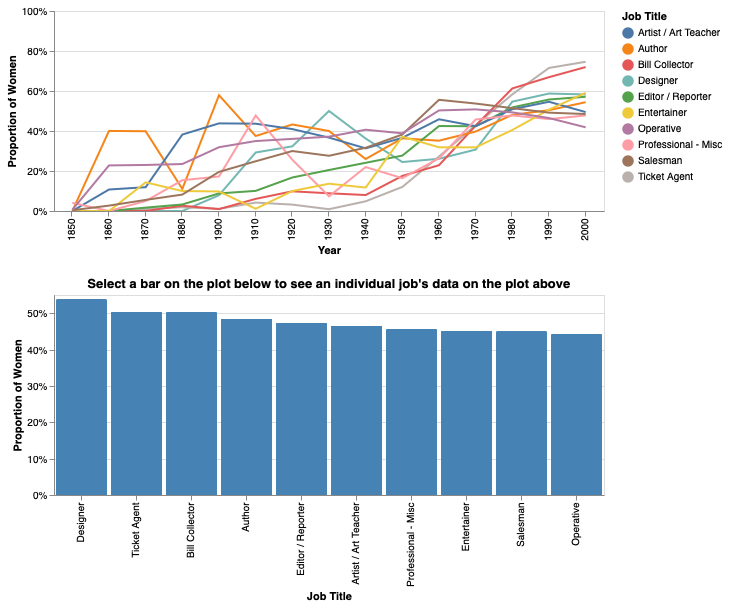